# Real Estate Price Prediction Using Machine Learning

## Executive Summary
Accurately estimating house prices is a critical aspect of the real estate industry. Understanding what drives property calue helps inform pricing startegies, investment decisions and negotiations. This project leverages machine learning techniques to predict residential house prices. The goal is to build a predictive model that captures market patterns and outputs realistic, data driven price estimates.

### Business Challenge

Accurately estimating the price of residential properties is a key challenge in the real estate market. Buyers want fair deals, sellers want competitive pricing, and investors deek undervalued opportunities. This project aims to build a machine learning model that predicts house prices based on key property features such as size, location, condition and amenities.

Using the "House Price Prediction" dataset from Kaggle, the goal is to develop and evaluate regression models that can learn from historical housing data and provide reliable price estimates for new, unseen properties.

### Objectives
1. To support real estate agents and property developers in pricing homes more accurately, reducing overpricing or undervaluing properties.

2. To help home buyers and sellers make informed decisions by providing data-driven estimates of property values based on key housing features and market factors.

3. Identify key factors influencing price such as location, size, and condition.

4. Reduce manual valuation effort with an automated, objective prediction tool.

5. Detect market trends and pricing anomalies to support investment decisions.

6. Simulate renovation impact on value to guide high-return property upgrades.

7. Provide real estate platforms with an instant price prediction feature.

### This project will involve:
    A[Data Loading] --> B[Data Cleaning and Preprocessing]
    B --> C[Feature engineering]
    C --> D[Exploratory Data Analysis(EDA)]
    D --> E[Model Training and Evaluation]
    E --> F[Conclusions & Recommendations]

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,make_scorer,roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
#from imblearn.over_sampling import SMOTE
import joblib


### 1. Loading and inspecting the data

In [295]:
#Load the dataset in Python using pandas and inspect the first few rows

df=pd.read_csv("Data/HousingData.csv")
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


This dataset contains detailed information on residential properties, including their physical attributes, location and sale prices. Key attributes in the dataset include:
- **Price**: The target variable representing the sale price of the house.

- **Bedrooms** & **Bathrooms**: Number of bedrooms and bathrooms in the property.

- **Living Area** & **Lot Size**: Square footage of the interior living space and the overall lot.

- **Floors**: Number of floors in the house.

- **Waterfront**, **View**, and **Condition**: Qualitative indicators of whether the house has a waterfront view, general view quality, and condition rating.

- **Year Built** & **Year Renovated**: Construction year and the year of last major renovation (if any).

- **Location Information**: Street address, city, state, and ZIP code.

In [296]:
# Checking the shape of the dataset (rows, columns)

df.shape

(4600, 18)

In [297]:
# Checking dataset structure and column details

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

The output shows the count of non-null entries, data types, and memory usage, which helps in spotting missing values and identifying opportunities for type conversion.

Based on the above, it will be necessary to change the data type of date from **object** type and convert it to **datetime** using **pd.to_datetime()**

In [299]:
#Changing the datatype
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

print(df[['date', 'year', 'month']].dtypes)


date     datetime64[ns]
year              int32
month             int32
dtype: object


Converting selected columns to the `category` data type to optimize memory usage and prepare for encoding.

In [300]:
categorical_cols = ['city', 'statezip', 'country']
for col in categorical_cols:
    df[col] = df[col].astype('category')

categorical_cols


['city', 'statezip', 'country']

In [301]:
print(df.dtypes)

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                   category
statezip               category
country                category
year                      int32
month                     int32
dtype: object


In [302]:
# Checking for missing values
print(df.isnull().sum())


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
year             0
month            0
dtype: int64


In [303]:
#Converting bedrooms and price to integers

cols_to_int = ['bedrooms', 'price']

for col in cols_to_int:
    df[col] = df[col].astype(int)


In [304]:
# Handle outliers using IQR
numeric_cols = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)            # 25th percentile
    Q3 = df[col].quantile(0.75)            # 75th percentile
    IQR = Q3 - Q1                          # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR           # Lower outlier threshold
    upper_bound = Q3 + 1.5 * IQR           # Upper outlier threshold
    
    # This replaces outliers with the nearest acceptable value
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


In [305]:
numeric_cols

['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']

### Dropping Irrelevant Columns

The `date` column has already been used to extract useful features such as `year` and `month`, making it redundant in its original form. The `street` column is high-cardinality and unlikely to provide predictive value to the model. Therefore, we drop both columns to clean the dataset and reduce noise.


In [306]:
cols_to_drop = ['date', 'street']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)


In [307]:
#Confirming date and street were dropped
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'statezip', 'country', 'year',
       'month'],
      dtype='object')


### Feature Engineering

Creating a new feature 'price_per_sqft'

In [308]:
# Create the new feature
df['price_per_sqft'] = df['price'] / df['sqft_living']

# Optional: Check for any infinite or NaN values
df['price_per_sqft'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['price_per_sqft'], inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_18736\212188362.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_per_sqft'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [309]:
# Preview the updated DataFrame
df[['price', 'sqft_living', 'price_per_sqft']].head()

,price,sqft_living,price_per_sqft
0,313000.00,1340,233.582090
1,1153093.75,3650,315.916096
2,342000.00,1930,177.202073
3,420000.00,2000,210.000000
4,550000.00,1940,283.505155


c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


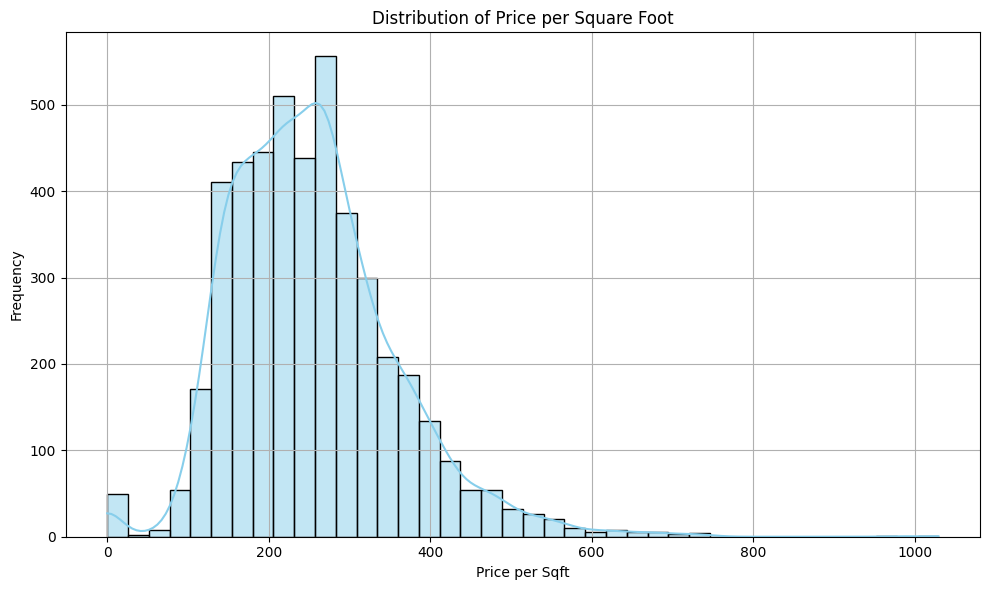

In [310]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True, bins=40, color='skyblue')
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


The plot shows a rightly skewed histogram indicating that most properties are moderately priced, while a few have very high prices that pull the distribution's tail to the right. This suggests the presence of luxury or premium properties influencing the average and may require log transformation for better model performance.

Creating a new feature 'mean_price_per_sqft_city' to calculate the average price per square foot per city

In [311]:
# Group by city and calculate mean price per sqft
city_price_per_sqft = df.groupby('city').apply(lambda x: x['price'].mean() / x['sqft_living'].mean())

# Assign to a new column in the original dataset
df['mean_price_per_sqft_city'] = df['city'].map(city_price_per_sqft)


C:\Users\USER\AppData\Local\Temp\ipykernel_18736\283196958.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_price_per_sqft = df.groupby('city').apply(lambda x: x['price'].mean() / x['sqft_living'].mean())
C:\Users\USER\AppData\Local\Temp\ipykernel_18736\283196958.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  city_price_per_sqft = df.groupby('city').apply(lambda x: x['price'].mean() / x['sqft_living'].mean())


In [312]:
print(df[['city', 'mean_price_per_sqft_city']].head())

        city mean_price_per_sqft_city
0  Shoreline               230.547981
1    Seattle               300.409755
2       Kent               152.425255
3   Bellevue               287.665043
4    Redmond               269.895653


### Encoding Categorical Variables

Machine learning models require numerical input, so categorical variables must be converted into a numerical format. In this case, we use **one-hot encoding** to transform columns like `city`, `statezip`, and `country` into binary indicator variables. We use `drop_first=True` to avoid the dummy variable trap, which helps prevent multicollinearity in models like linear or logistic regression.


In [313]:
# Reduce cardinality by keeping only top N categories
top_n = 10

top_cities = df['city'].value_counts().nlargest(top_n).index
df['city'] = df['city'].apply(lambda x: x if x in top_cities else 'Other')

top_zips = df['statezip'].value_counts().nlargest(top_n).index
df['statezip'] = df['statezip'].apply(lambda x: x if x in top_zips else 'Other')

In [314]:
categorical_cols = ['city', 'statezip', 'country']

# Create a new DataFrame with one-hot encoded categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert boolean columns to integer (0/1)
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.columns if df_encoded[col].dtype == 'bool'})

# Preview the encoded DataFrame
print(df_encoded.head())




        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.00       3.0       1.50         1340      7912     1.5           0   
1  1153093.75       5.0       2.50         3650      9050     2.0           0   
2   342000.00       3.0       2.00         1930     11947     1.0           0   
3   420000.00       3.0       2.25         2000      8030     1.0           0   
4   550000.00       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  ...  statezip_WA 98006  statezip_WA 98034  \
0     0          3        1340  ...                  0                  0   
1     4          5        3370  ...                  0                  0   
2     0          4        1930  ...                  0                  0   
3     0          4        1000  ...                  0                  0   
4     0          4        1140  ...                  0                  0   

   statezip_WA 98042  statezip_WA 98052  statezip_

In [315]:
df_encoded.describe().T  # Transposed for easier viewing


,count,mean,std,min,25%,50%,75%,max
price,4600.0,516993.292391,261471.572219,0.000,322875.000000,460943.000000,654962.500000,1.153094e+06
bedrooms,4600.0,3.392609,0.856964,1.500,3.000000,3.000000,4.000000,5.500000e+00
bathrooms,4600.0,2.139158,0.720548,0.625,1.750000,2.250000,2.500000,3.625000e+00
sqft_living,4600.0,2114.626739,867.106902,370.000,1460.000000,1980.000000,2620.000000,4.360000e+03
sqft_lot,4600.0,8934.793261,5388.102126,638.000,5000.750000,7683.000000,11001.250000,2.000200e+04
floors,4600.0,1.512065,0.538288,1.000,1.000000,1.500000,2.000000,3.500000e+00
waterfront,4600.0,0.007174,0.084404,0.000,0.000000,0.000000,0.000000,1.000000e+00
view,4600.0,0.240652,0.778405,0.000,0.000000,0.000000,0.000000,4.000000e+00
condition,4600.0,3.451739,0.677230,1.000,3.000000,3.000000,4.000000,5.000000e+00
sqft_above,4600.0,1827.265435,862.168977,370.000,1190.000000,1590.000000,2300.000000,9.410000e+03


In [316]:
df_encoded[df_encoded['price'] == 0]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98006,statezip_WA 98034,statezip_WA 98042,statezip_WA 98052,statezip_WA 98053,statezip_WA 98059,statezip_WA 98074,statezip_WA 98103,statezip_WA 98115,statezip_WA 98117
4354,0.0,3.0,1.750,1490,10125,1.0,0,0,4,1490,...,0,0,0,0,0,0,0,0,0,0
4356,0.0,4.0,2.750,2600,5390,1.0,0,0,4,1300,...,0,0,0,0,0,0,0,0,0,0
4357,0.0,5.5,2.750,3200,9200,1.0,0,2,4,1600,...,0,0,0,0,0,0,0,0,0,0
4358,0.0,5.0,3.500,3480,20002,2.0,0,0,4,2490,...,0,0,0,0,0,0,0,0,0,0
4361,0.0,5.0,1.500,1500,7112,1.0,0,0,5,760,...,0,0,0,0,0,0,0,0,0,0
4362,0.0,4.0,3.625,3680,18804,2.0,0,0,3,3680,...,0,0,0,0,0,0,1,0,0,0
4374,0.0,2.0,2.500,2200,20002,1.0,0,3,3,2200,...,0,0,0,0,0,0,0,0,0,0
4376,0.0,4.0,2.250,2170,10500,1.0,0,2,4,1270,...,0,0,0,0,0,0,0,0,0,0
4382,0.0,5.0,3.625,4360,6324,2.0,0,0,3,3210,...,0,0,0,0,0,0,0,0,0,0
4383,0.0,5.0,3.625,4360,9000,2.0,0,0,3,4430,...,0,0,0,0,0,0,0,0,0,0


In [317]:
(df_encoded['price'] == 0).sum()


49

#### Dropping Invalid Price Entries

Some rows in the dataset had a house price of 0, which is not realistic for a housing market. These entries likely represent missing or incorrect data. Since they make up just over 1% of the dataset, they are safely removed to avoid negatively impacting model training.


In [318]:
#Removing columns with a house price of 0
df_encoded = df_encoded[df_encoded['price'] != 0]

print(df_encoded.shape)


(4551, 37)


In [319]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4551.0,522559.689079,257282.400079,7800.000,326264.000000,465000.000000,657500.000000,1.153094e+06
bedrooms,4551.0,3.386399,0.852697,1.500,3.000000,3.000000,4.000000,5.500000e+00
bathrooms,4551.0,2.134970,0.717214,0.625,1.750000,2.250000,2.500000,3.625000e+00
sqft_living,4551.0,2108.644913,862.904002,370.000,1460.000000,1970.000000,2610.000000,4.360000e+03
sqft_lot,4551.0,8913.638761,5385.045286,638.000,5000.000000,7680.000000,10978.000000,2.000200e+04
floors,4551.0,1.512195,0.538531,1.000,1.000000,1.500000,2.000000,3.500000e+00
waterfront,4551.0,0.006592,0.080932,0.000,0.000000,0.000000,0.000000,1.000000e+00
view,4551.0,0.234674,0.765373,0.000,0.000000,0.000000,0.000000,4.000000e+00
condition,4551.0,3.449352,0.675160,1.000,3.000000,3.000000,4.000000,5.000000e+00
sqft_above,4551.0,1822.221710,854.452888,370.000,1190.000000,1590.000000,2300.000000,9.410000e+03


Create a filtered version of the DataFrame without extreme high-price outliers and name it `df_filtered`

In [320]:
price_cap = df['price'].quantile(0.99)
print(f"99th percentile price: ${price_cap:,.2f}")

99th percentile price: $1,153,093.75


In [321]:
# Create a filtered version of the DataFrame without extreme high-price outliers
df_filtered = df[df['price'] <= 1_153_093.75]



### Frequency Summary of One-Hot Encoded Binary Columns

To better understand the distribution of categories after one-hot encoding, we calculate the proportion of 1s (i.e., presence of each category) for all binary columns. This helps identify rare or dominant categories that may impact model performance.


In [322]:
binary_cols = [col for col in df_encoded.columns 
               if df_encoded[col].nunique() == 2 and 
               set(df_encoded[col].unique()).issubset({0, 1})]


In [323]:
print("\nSummary Statistics for Binary Columns (Proportion of 1s):") 
binary_summary = df_encoded[binary_cols].mean().sort_values(ascending=False)
print(binary_summary)



Summary Statistics for Binary Columns (Proportion of 1s):
city_Seattle         0.343002
city_Other           0.249396
city_Renton          0.063942
city_Bellevue        0.061745
city_Redmond         0.051637
city_Kirkland        0.041090
city_Issaquah        0.040870
city_Kent            0.040431
city_Sammamish       0.037574
statezip_WA 98103    0.032520
city_Federal Way     0.031861
statezip_WA 98052    0.029664
statezip_WA 98117    0.029005
statezip_WA 98115    0.028345
statezip_WA 98006    0.023951
statezip_WA 98059    0.023292
statezip_WA 98034    0.021753
statezip_WA 98042    0.021534
statezip_WA 98053    0.021534
statezip_WA 98074    0.020655
waterfront           0.006592
dtype: float64


### Binary Feature Distribution

After one-hot encoding categorical variables, we calculated the proportion of 1s for each binary column. This reveals how frequently each category appears in the dataset.

- The most common city is Seattle, representing over 34% of listings.
- Several cities and zip codes occur in less than 0.1% of the data, which may be considered rare and could potentially be dropped or grouped in future steps.


In [324]:
# Save the cleaned and encoded data
df_encoded.to_csv('Data/cleaned_housing_data.csv', index=False)

# Confirmation prints
print("Encoded and cleaned data saved to 'cleaned_housing_data.csv'")
print(f"Data shape: {df_encoded.shape}")
print(df_encoded.head())



Encoded and cleaned data saved to 'cleaned_housing_data.csv'
Data shape: (4551, 37)
        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.00       3.0       1.50         1340      7912     1.5           0   
1  1153093.75       5.0       2.50         3650      9050     2.0           0   
2   342000.00       3.0       2.00         1930     11947     1.0           0   
3   420000.00       3.0       2.25         2000      8030     1.0           0   
4   550000.00       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  ...  statezip_WA 98006  statezip_WA 98034  \
0     0          3        1340  ...                  0                  0   
1     4          5        3370  ...                  0                  0   
2     0          4        1930  ...                  0                  0   
3     0          4        1000  ...                  0                  0   
4     0          4        1140  ...         

## 2. Exploratory Data Analysis



In [325]:
# Load the cleaned dataset
df_encoded= pd.read_csv('Data/cleaned_housing_data.csv')
df_encoded

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98006,statezip_WA 98034,statezip_WA 98042,statezip_WA 98052,statezip_WA 98053,statezip_WA 98059,statezip_WA 98074,statezip_WA 98103,statezip_WA 98115,statezip_WA 98117
0,313000.00,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,1153093.75,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.00,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,1,0,0,0,0,0,0,0
3,420000.00,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.00,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,308166.00,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,0,0,0,0,0,0,0,0,0,0
4547,534333.00,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,0
4548,416904.00,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,0,0,0,0,1,0,0,0,0
4549,203400.00,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,0,0,0,0,0,0,0,0,0,0


In [326]:
# Summary statistics
print("EDA Summary Statistics:")
df_encoded.describe(include='all')

EDA Summary Statistics:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98006,statezip_WA 98034,statezip_WA 98042,statezip_WA 98052,statezip_WA 98053,statezip_WA 98059,statezip_WA 98074,statezip_WA 98103,statezip_WA 98115,statezip_WA 98117
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,...,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.225597e+05,3.386399,2.134970,2108.644913,8913.638761,1.512195,0.006592,0.234674,3.449352,1822.221710,...,0.023951,0.021753,0.021534,0.029664,0.021534,0.023292,0.020655,0.032520,0.028345,0.029005
std,2.572824e+05,0.852697,0.717214,862.904002,5385.045286,0.538531,0.080932,0.765373,0.675160,854.452888,...,0.152913,0.145894,0.145171,0.169677,0.145171,0.150845,0.142241,0.177397,0.165976,0.167838
min,7.800000e+03,1.500000,0.625000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.262640e+05,3.000000,1.750000,1460.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1190.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7680.000000,1.500000,0.000000,0.000000,3.000000,1590.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,10978.000000,2.000000,0.000000,0.000000,4.000000,2300.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.153094e+06,5.500000,3.625000,4360.000000,20002.000000,3.500000,1.000000,4.000000,5.000000,9410.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [214]:
# Select numerical columns only (excluding dummy/binary columns)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()


#### Distribution of Key Numerical Features

This grid of histograms shows the distribution of the first 9 numerical features in the dataset. This will help us understand the spread, central tendency, and skewness of each feature before modeling.  
- **What to look for:**  
  - Features with strong skew (which may need transformation)
  - Features with narrow ranges or outliers
  - Normal or multimodal distributions

The KDE (Kernel Density Estimate) curves overlaid on each histogram help us visually assess the shape of each distribution.

---


c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_18736\2724170745.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remove

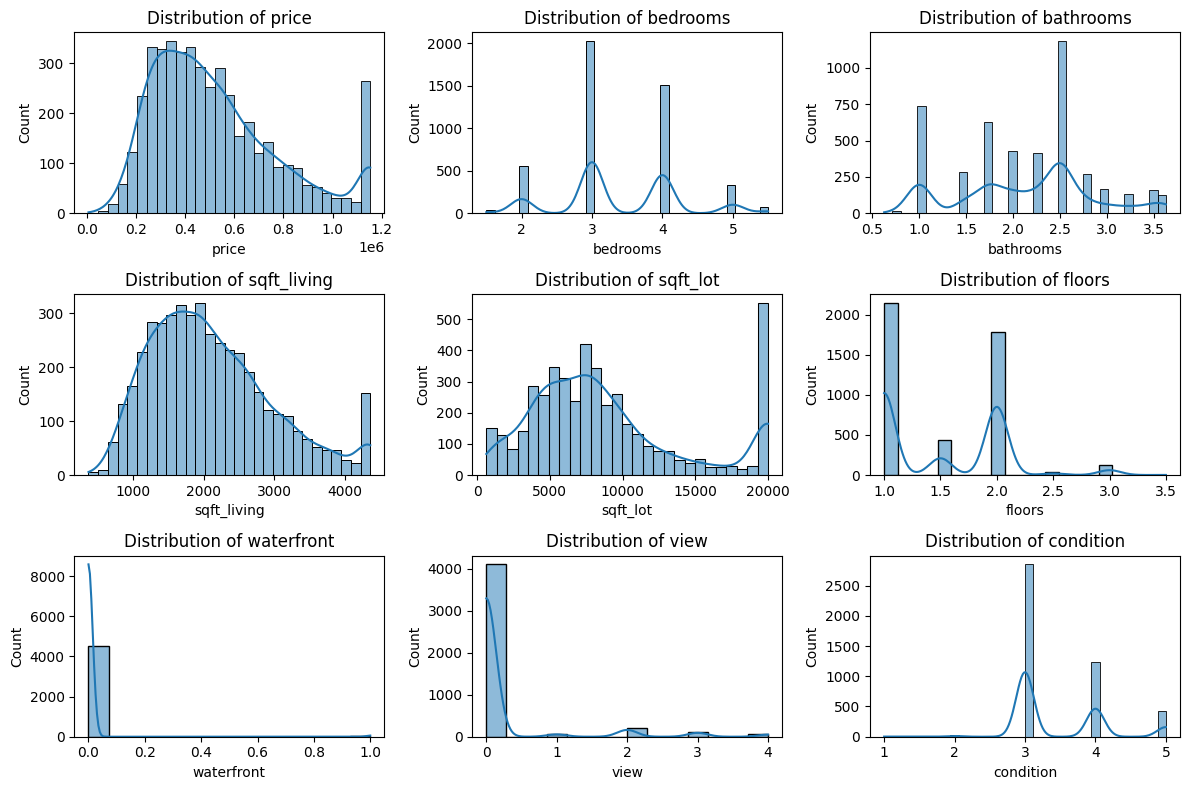

In [327]:
#Visualize Distribution of Key Numerical Columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols[:9], 1):  # limit to 9 columns
    plt.subplot(3, 3, i)
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()



#### Boxplot of House Prices

This boxplot provides a visual summary of the distribution of house prices, highlighting potential **outliers** — unusually high or low values compared to the rest of the data. 

- The box represents the **interquartile range (IQR)**, which contains the middle 50% of the data.
- The line inside the box is the **median**.
- Points outside the "whiskers" are considered **potential outliers**.

This helps identify anomalies that might skew analysis or require further investigation.


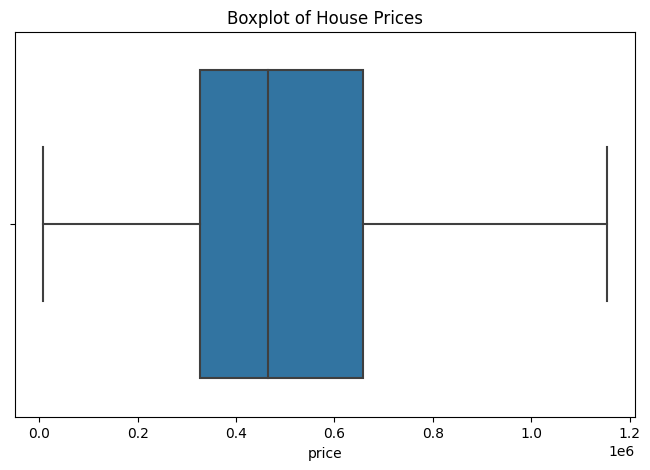

In [328]:
#Boxplots (to spot outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_encoded['price'])
plt.title('Boxplot of House Prices')
plt.show()


#### Price vs. Number of Bedrooms

This boxplot shows the distribution of **house prices** across different **numbers of bedrooms**.

- **Whiskers** extend to show the range of most data points, while **dots** outside are potential **outliers**.

This visualization helps identify how the number of bedrooms affects price trends and spot any unusual price patterns for specific bedroom counts.


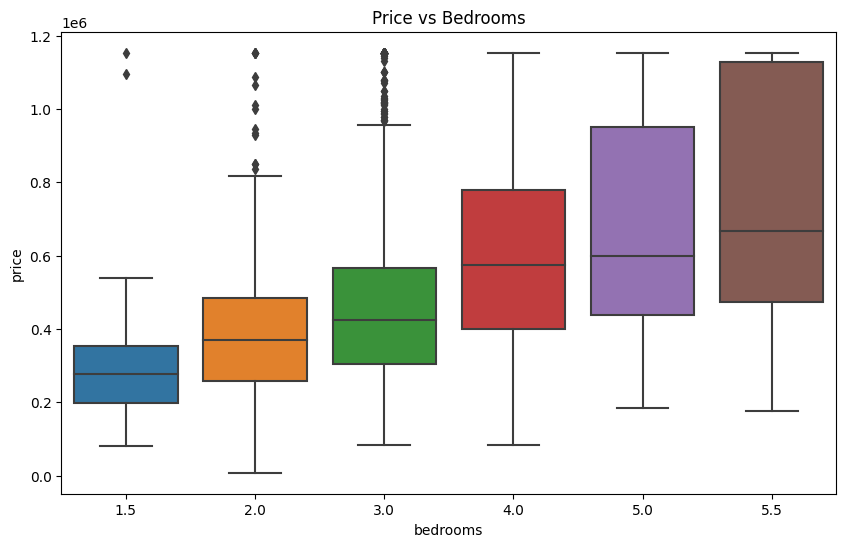

In [329]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df_encoded)
plt.title('Price vs Bedrooms')
plt.show()


#### Correlation Heatmap (Excluding City and ZIP Code)

To make the correlation heatmap more readable, **city** and **state ZIP code** one-hot encoded columns were excluded:

- These columns often have many categories and can clutter the heatmap.
- The remaining columns are used to compute pairwise **correlation coefficients**.

The heatmap visualizes these correlations:

- **Red** areas indicate strong positive correlations.
- **Blue** areas show strong negative correlations.
- Values near **0** indicate weak or no correlation.

This helps identify relationships between numerical features in the dataset, such as how certain variables may influence house prices.


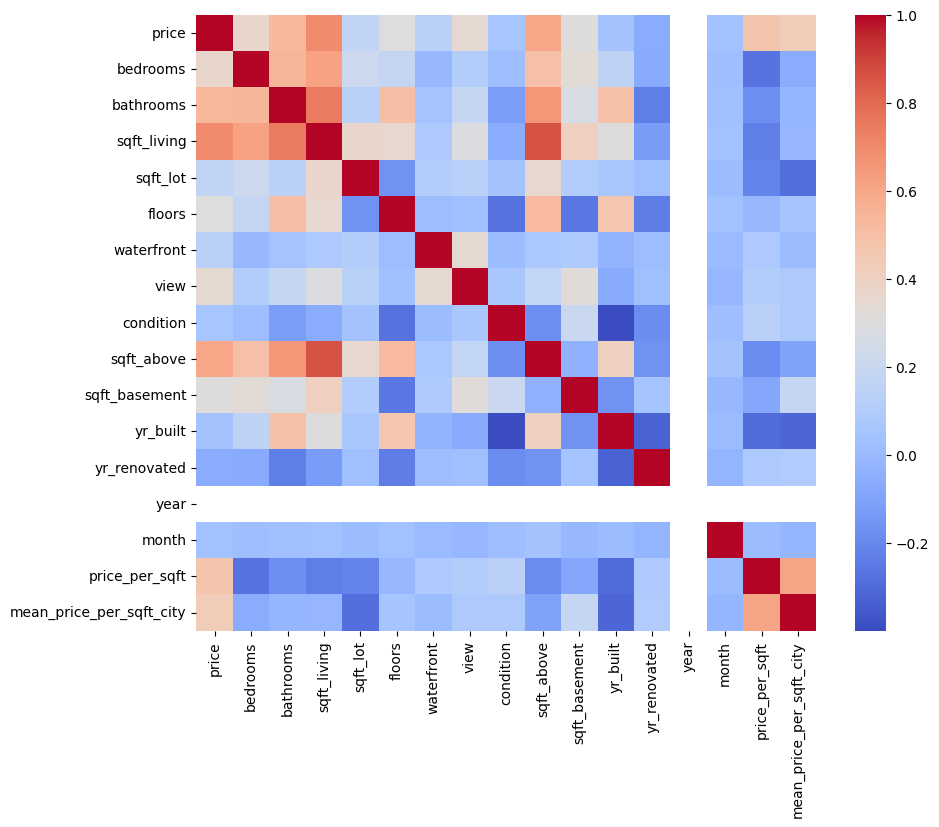

In [330]:
# Exclude city and statezip columns for a more legible heatmap
cols_to_exclude = [col for col in df_encoded.columns if col.startswith('city_') or col.startswith('statezip_')]
 
# Select columns excluding those
heatmap_cols = df_encoded.drop(columns=cols_to_exclude)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_cols.corr(), cmap='coolwarm', annot=False)
plt.show()



Variables like **sqft_living**, **bathrooms**, and **view** show strong positive correlations, indicating they are good predictors of price. Others like **condition** and **yr_built** have weaker or negative correlations, suggesting less predictive value.

### Top 10 Features Most Correlated with Price

This bar plot shows the top 10 numerical features that have the strongest absolute correlation with **price**. This will help identify which features are most linearly associated with the target variable.  
- **What to look for:**  
  - Features with high positive or negative correlation (closer to ±1)
  - Which features might be the strongest predictors in your regression model
  - Potential for multicollinearity if several features are closely related to each other

This step helps prioritize which variables to explore or engineer further for model building.

---


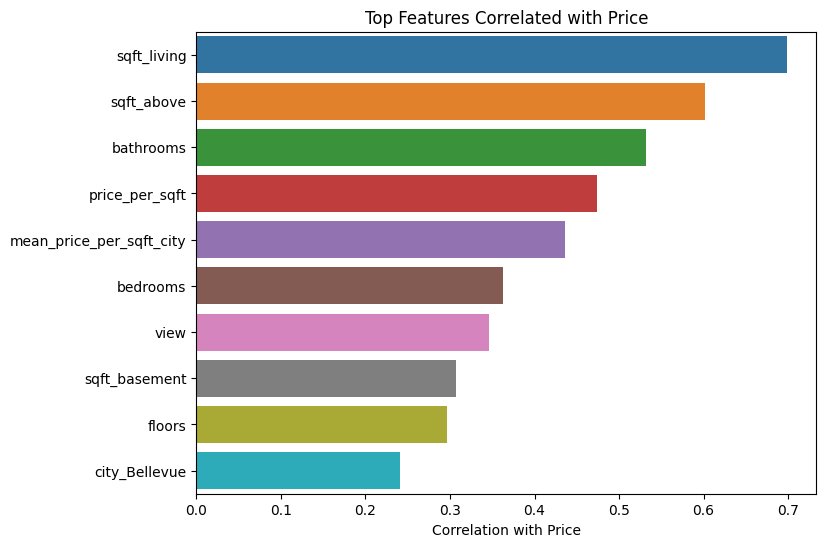

In [331]:
# Create correlation matrix
corr = df_encoded.corr(numeric_only=True)

top_corr = corr['price'].abs().sort_values(ascending=False)[1:11]
plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top Features Correlated with Price')
plt.xlabel('Correlation with Price')
plt.show()


#### Scatter Plot: Price vs. Square Footage of Living Area

This scatter plot visualizes the relationship between the size of the living area (`sqft_living`) and the house price. This will help to observe how living space affects pricing, and to spot any patterns, clusters, or outliers.  
- **What to look for:**  
  - A general upward trend suggests larger homes tend to have higher prices  
  - Outliers (e.g., extremely large homes with low prices, or vice versa)  
  - Non-linear patterns or heteroscedasticity (widening spread as square footage increases)

This helps determine if transformations (e.g., log) or feature scaling might be useful later in modeling.



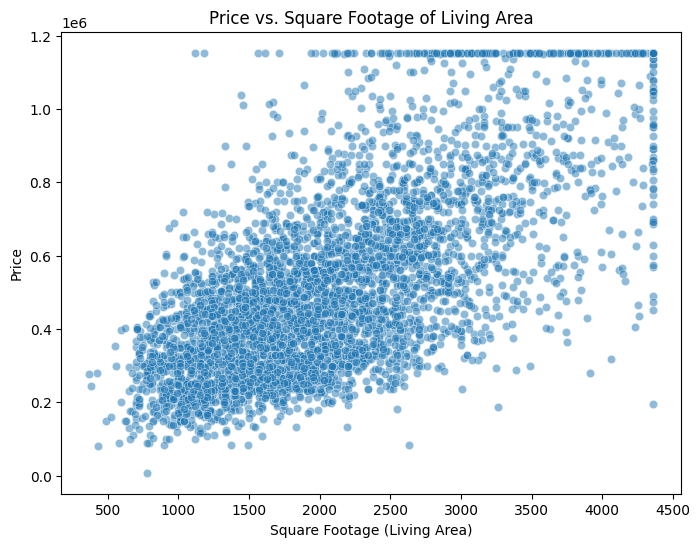

In [332]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_encoded, x='sqft_living', y='price', alpha=0.5)
plt.title('Price vs. Square Footage of Living Area')
plt.xlabel('Square Footage (Living Area)')
plt.ylabel('Price')
plt.show()


#### Scatter Plot: Price vs. Bedrooms

This scatter plot shows the relationship between the **number of bedrooms** and **house price**.

- Each point represents a house.
- The **x-axis** shows the number of bedrooms.
- The **y-axis** shows the corresponding house price.
- The `alpha=0.5` setting adds transparency to help visualize overlapping points.

This plot helps detect patterns or clusters, such as whether more bedrooms are generally associated with higher prices, or if there are outliers breaking that trend.


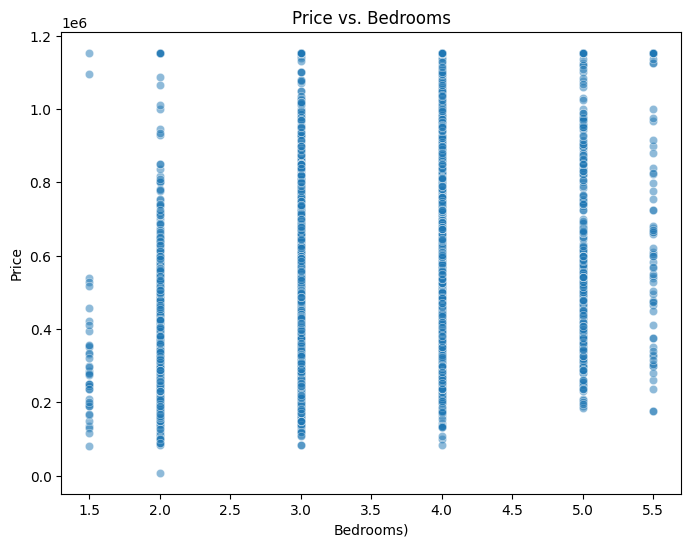

In [333]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_encoded, x='bedrooms', y='price', alpha=0.5)
plt.title('Price vs. Bedrooms')
plt.xlabel('Bedrooms)')
plt.ylabel('Price')
plt.show()


## 3. Modelling

In [334]:
print(df.columns.tolist())


['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'city', 'statezip', 'country', 'year', 'month', 'price_per_sqft', 'mean_price_per_sqft_city']


In [335]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   price                     4600 non-null   float64 
 1   bedrooms                  4600 non-null   float64 
 2   bathrooms                 4600 non-null   float64 
 3   sqft_living               4600 non-null   int64   
 4   sqft_lot                  4600 non-null   int64   
 5   floors                    4600 non-null   float64 
 6   waterfront                4600 non-null   int64   
 7   view                      4600 non-null   int64   
 8   condition                 4600 non-null   int64   
 9   sqft_above                4600 non-null   int64   
 10  sqft_basement             4600 non-null   int64   
 11  yr_built                  4600 non-null   int64   
 12  yr_renovated              4600 non-null   int64   
 13  city                      4600 non-null   object

### Train-Test Split and Feature Scaling

Before training any models, it's important to split the dataset into training and testing sets. This ensures that the model is evaluated on unseen data, giving a realistic measure of its performance.

Feature scaling is applied **after splitting the data** to prevent data leakage. We scale only the training data using `StandardScaler` and apply the same transformation to the test data. This step is essential for models that are sensitive to the scale of input features (e.g., linear regression, logistic regression, SVM, KNN).


In [336]:
from sklearn.preprocessing import StandardScaler

# Define features to exclude from modeling
excluded_features = ['price', 'price_per_sqft', 'mean_price_per_sqft_city']

# Drop features and target
X = df_encoded.drop(['price', 'price_per_sqft', 'mean_price_per_sqft_city'], axis=1) # Features
y = df_encoded['price']               # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [337]:
# Scale numerical columns
numerical_cols_to_scale = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                           'bathrooms', 'bedrooms', 'floors', 'year', 'month']

scaler = StandardScaler()
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

### Baseline Model: Linear Regression

To begin modeling, we train a simple Linear Regression model as our baseline. This model assumes a linear relationship between the features and the target variable (`price`).

While it may not capture complex patterns, it allows us to:
- Evaluate how well linear features explain price
- Benchmark performance against more advanced models later
- Visualize prediction accuracy

We'll use common regression metrics such as R², MAE, MSE, and RMSE to evaluate the model's performance.


In [338]:
# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

Linear Regression Performance:
R² Score: 0.6763
MAE: $101,303.79
MSE: $21,414,892,503.79
RMSE: $146,338.28


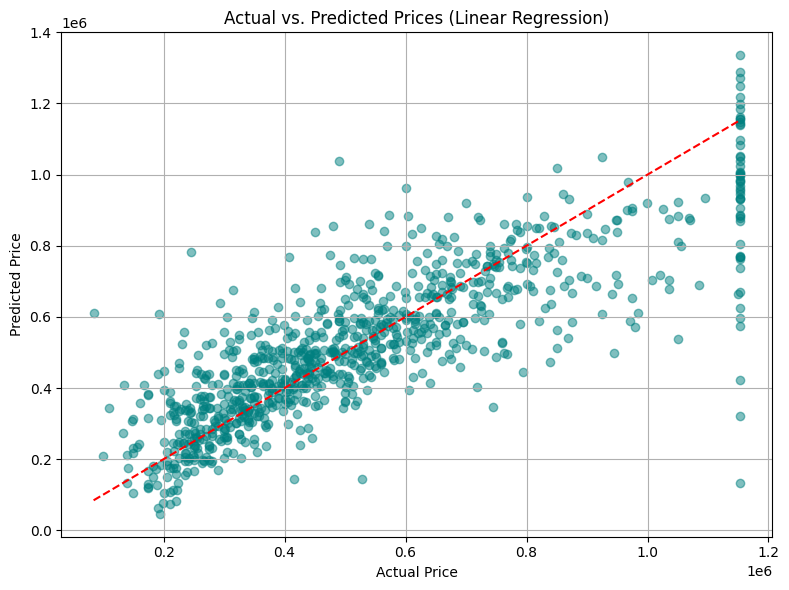

In [339]:
print("Linear Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"MSE: ${mse:,.2f}")
print(f"RMSE: ${rmse:,.2f}")

# 4. Plot predicted vs actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Linear Regression Results 

After removing engineered features that introduced data leakage (e.g., `price_per_sqft`), the Linear Regression model was retrained on clean, realistic inputs. Here are the results:

- **R² Score:** 0.6673  
  The model explains approximately 66.7% of the variance in house prices which is a decent baseline for a linear model.

- **Mean Absolute Error (MAE):** $101,303.79
  On average, the model's predictions are off by about $103K, which is typical given the wide price range in real estate data.

- **Root Mean Squared Error (RMSE):** $146,338.28  
  The RMSE is higher than the MAE, indicating the presence of some larger errors which are likely from high-end properties.

#### Observations
- Performance is now more realistic and interpretable compared to previous runs with data leakage.
- The model tends to underpredict for very expensive homes, which is expected given the linearity assumption.
- These results serve as a **strong baseline** for comparison with more complex models like Random Forest or Gradient Boosting.

#### Next Steps
- Train **non-linear models** (e.g., Decision Tree and Random Forest) to potentially capture more complex patterns.
- Explore **feature transformations** (e.g., log of price or square footage) if residual plots show heteroscedasticity.


### OLS Regression

In [348]:


# Add constant to X_train for intercept
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Print detailed OLS regression summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     279.1
Date:                Tue, 22 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:01:32   Log-Likelihood:                -48244.
No. Observations:                3640   AIC:                         9.655e+04
Df Residuals:                    3607   BIC:                         9.676e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.138e+06   2.48e+0

##### OLS Regression Results between Features and House Price

The Ordinary Least Squares (OLS) regression model provides valuable insights into how different features contribute to predicting house prices.

**Model Fit:**
- **R² Score**: 0.712 — The model explains ~70.4% of the variance in house prices.
- **Adjusted R²**: 0.710 — Adjusts for the number of predictors; still indicates a strong model.
- **F-statistic**: 279.1 (p < 0.001) — The overall regression model is statistically significant.

**Key Coefficients (Significant at p < 0.05):**
- **Bedrooms**: −$21,760 — Holding other factors constant, more bedrooms slightly decrease price.
- **Bathrooms**: +$30,650 — More bathrooms are associated with higher prices.
- **sqft_living**: +$138,100 — Strong positive relationship with price.
- **yr_built**: −$1,013 — Older homes tend to be priced lower.
- **City & Zip Codes**: Homes in Bellevue, Kirkland, Seattle, and Sammamish have significantly higher prices than others.
  
**Notes:**
- Some variables (e.g., `sqft_lot`, `waterfront`, `yr_renovated`) are **not statistically significant**, suggesting limited individual predictive power.
- The **p-value of 0.000** for most key predictors indicates strong evidence against the null hypothesis (i.e., that their coefficients are zero).
- The warning on **multicollinearity** suggests some predictors may be highly correlated, potentially distorting coefficient estimates.
 
The model captures general price trends well, though further refinement (e.g., addressing multicollinearity, feature selection) could improve interpretability and performance.





### Applying log transformation to target

This transformation aims to:

- Stabilize variance 

- Make relationships more linear 

- Improve model assumptions like normality of errors

In [262]:
# Apply log transformation to target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


In [263]:
# Train a linear regression model on log-transformed price
lin_reg_log = LinearRegression()
lin_reg_log.fit(X_train, y_train_log)

# Predict on the test set
y_pred_log = lin_reg_log.predict(X_test)

# Reverse the log transformation for predictions
y_pred_original = np.expm1(y_pred_log)


In [341]:
# Evaluate on original scale
r2 = r2_score(y_test, y_pred_original)
mae = mean_absolute_error(y_test, y_pred_original)
mse = mean_squared_error(y_test, y_pred_original)
rmse = np.sqrt(mse)

print("Linear Regression with Log-Transformed Target:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"MSE: ${mse:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


Linear Regression with Log-Transformed Target:
R² Score: 0.6173
MAE: $105,632.37
MSE: $25,318,555,016.56
RMSE: $159,118.05


**Linear Regression with Log-Transformed Target**


To improve model performance and stabilize variance, a log transformation was applied to the target variable (`price`). The results of the model after inverse-transforming predictions back to dollar values are as follows:

**Performance Metrics:**
- **R² Score**: 0.6173  
  The model explains approximately 61.7% of the variance in the actual house prices.
- **MAE (Mean Absolute Error)**: $105,632.37  
  On average, predictions deviate from actual prices by about $105K.
- **MSE (Mean Squared Error)**: $25,318,555,016.56  
  Measures the average of the squared errors.
- **RMSE (Root Mean Squared Error)**: $159,118.05  
  A more interpretable version of MSE in dollars; indicates the typical prediction error size.

Applying the log transformation slightly reduced model accuracy compared to the baseline linear regression (R² ~0.6671), possibly due to information loss in back-transformation. However, this approach often helps in handling skewed distributions and may be beneficial for residual analysis and normality assumptions.




## Regularized Models: Ridge and Lasso Regression

To improve upon our baseline Linear Regression model, we apply two types of regularized regression:

- **Ridge Regression (L2 penalty):** Shrinks coefficients to reduce multicollinearity, but keeps all features.
- **Lasso Regression (L1 penalty):** Can shrink some coefficients to zero, effectively performing feature selection.

These models help prevent overfitting and manage high-dimensional data from one-hot encoding.

We’ll compare their performance using R², MAE, MSE, and RMSE metrics.


In [342]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [343]:
# Fit Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)

# Fit Lasso Regression
lasso = Lasso(alpha=0.1)  # You can experiment with alpha values
lasso.fit(X_train_scaled, y_train)
lasso_preds = lasso.predict(X_test_scaled)

c:\Users\USER\Documents\Moringa\Phase 3\Phase3_Project\real-estate-price-prediction\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.029e+12, tolerance: 2.409e+10
  model = cd_fast.enet_coordinate_descent(


In [344]:
# Define a function to print results
def print_metrics(name, y_test, y_pred):
    print(f"\n{name} Performance:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: ${mean_absolute_error(y_test, y_pred):,.2f}")
    print(f"MSE: ${mean_squared_error(y_test, y_pred):,.2f}")
    print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):,.2f}")

# Evaluate both
print_metrics("Ridge Regression", y_test, ridge_preds)
print_metrics("Lasso Regression", y_test, lasso_preds)


Ridge Regression Performance:
R² Score: 0.6760
MAE: $101,376.31
MSE: $21,433,908,842.79
RMSE: $146,403.24

Lasso Regression Performance:
R² Score: 0.6762
MAE: $101,320.66
MSE: $21,417,517,607.56
RMSE: $146,347.25


**Regularized Linear Models (Ridge & Lasso Regression)**

To address multicollinearity and prevent overfitting, Ridge and Lasso regression models were applied to the dataset. Both models yielded the following performance:

| Model     | R² Score | MAE         | MSE     | RMSE        |
| --------- | -------- | ----------- | ------- | ----------- |
| **Ridge** | 0.6760   | \$101,376.31 | \$21.43B | \$146,403.24 |
| **Lasso** | 0.6762   | \$101,320.66 | \$21.42B | \$146,347.25 |


Both models performed similarly, indicating that regularization had minimal effect at the current settings.
- **Ridge Regression** (L2) shrinks coefficients but retains all features.
- **Lasso Regression** (L1) can reduce some coefficients to zero, effectively performing feature selection.

## Decision Tree Regression for House Price Prediction

In this section, we will use a **Decision Tree Regressor** to predict house prices based on our dataset.

#### Why Decision Trees?

- They can capture non-linear relationships between features and the target.
- They handle both numerical data well (especially after encoding).
- They are easy to interpret and visualize.

#### Features

We will use all relevant features including the one-hot encoded `statezip` and `city` columns, as Decision Trees can utilize these categorical features effectively.



In [345]:
# Train on raw price
tree_raw = DecisionTreeRegressor(random_state=42)
tree_raw.fit(X_train, y_train)  
y_pred_raw = tree_raw.predict(X_test)


In [346]:
# Metrics
r2 = r2_score(y_test, y_pred_raw)
mae = mean_absolute_error(y_test, y_pred_raw)
mse = mean_squared_error(y_test, y_pred_raw)
rmse = np.sqrt(mse)

print("Decision Tree Regression (Raw Target) Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"MSE: ${mse:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


Decision Tree Regression (Raw Target) Performance:
R² Score: 0.3100
MAE: $141,741.97
MSE: $45,643,237,861.18
RMSE: $213,642.78


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

# Initialize regressor
tree = DecisionTreeRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_tree = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("Optimized Decision Tree Performance:")
print("Best Params:", grid_search.best_params_)
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


Optimized Decision Tree Performance:
Best Params: {'max_depth': 10, 'min_samples_leaf': 20}
R² Score: 0.5805
MAE: $119,574.35
RMSE: $166,593.99


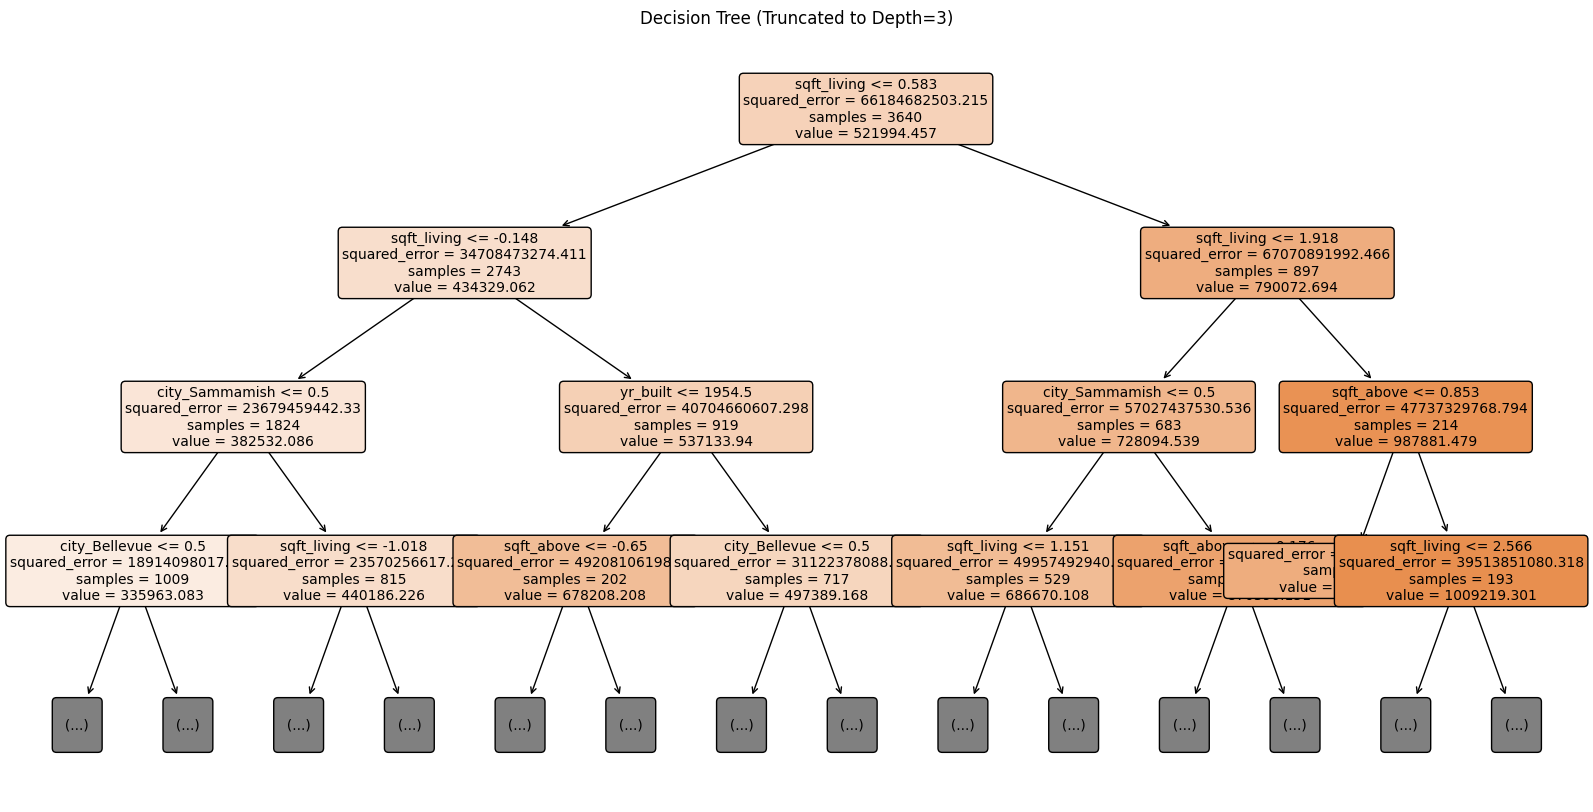

In [347]:


plt.figure(figsize=(20, 10))
plot_tree(
    best_tree,                      
    feature_names=list(X.columns),
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3                
)
plt.title("Decision Tree (Truncated to Depth=3)")
plt.show()


### Decision Tree Regression Results

#### Final Model Parameters:
- `max_depth`: **10**  
- `min_samples_leaf`: **20**

#### Model Performance:
| Metric      | Value         |
|-------------|---------------|
| **R² Score** | 0.5805        |
| **MAE**      | $119,574.35   |
| **RMSE**     | $166,593.99   |

- The optimized Decision Tree model underperformed compared to linear models, suggesting that tree-based models may not capture the data structure effectively at this depth and leaf size.
- However, it still provides a non-linear baseline and may be useful in an ensemble setting.



### Baseline Random Forest

In [272]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,       
    min_samples_leaf=1,  
    random_state=42,
    n_jobs=-1             
)


In [273]:
rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [274]:
y_pred = rf.predict(X_test) # Make predictions


In [275]:

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Random Forest Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"MSE: ${mse:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


Random Forest Regression Performance:
R² Score: 0.6287
MAE: $108,043.70
MSE: $24,562,954,293.00
RMSE: $156,725.73


### Random Forest Regression Results

Performance Metrics:
- **R² Score**: 0.6287  
- **MAE**: $108,043.70  
- **MSE**: $24,562,954,293.00  
- **RMSE**: $156,725.73 

- The Random Forest model slightly outperformed the Decision Tree, capturing more variance in the data. 
- However, it still did not surpass the performance of the regularized linear models (Ridge/Lasso), suggesting the dataset may be better suited to linear relationships or that additional tuning is needed.
- There is still room for improvement through hyperparameter tuning or trying gradient boosting methods.


In [276]:
# Base model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)



In [ ]:
# Fit
grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_

# Predict
y_pred = best_rf.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Results
print("Tuned Random Forest Performance:")
print(f"Best Params: {grid_search.best_params_}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"MSE: ${mse:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Tuned Random Forest Performance:
Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
R² Score: 0.6324
MAE: $107,785.49
MSE: $24,318,283,202.96
RMSE: $155,943.21


#### Random Forest Regression (Tuned) results

Performance Metrics:
- **R² Score**: 0.6324  
- **MAE**: $107,785.49  
- **MSE**: $24,318,283,202.96  
- **RMSE**: $155,943.21  

#### Interpretation:
- The tuned model slightly improved over the default Random Forest and the Decision Tree.
- Although the gain is marginal, it demonstrates the importance of tuning for ensemble methods.
- Performance still lags behind Ridge and Lasso Regression, indicating that simpler, regularized linear models may be more appropriate for this dataset.



In [280]:
print([col for col in df_encoded.columns if col.startswith('city_')])


['city_Bellevue', 'city_Issaquah', 'city_Kent', 'city_Kirkland', 'city_Other', 'city_Redmond', 'city_Renton', 'city_Sammamish', 'city_Seattle']


In [ ]:

#  Define selected features
features = [
    'sqft_living', 'sqft_above', 'sqft_lot', 'bedrooms', 'bathrooms',
    'yr_built', 'view', 'mean_price_per_sqft_city',
    'city_Seattle', 'city_Bellevue', 'city_Kent', 'city_Kirkland'
]

#  Define X and y
X = df_encoded[features]
y = df_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display results
print("🔹 Random Forest with Engineered Features")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


🔹 Random Forest with Engineered Features
R² Score: 0.6589
MAE: $101,211.51
RMSE: $150,220.82


After refining the feature set to avoid data leakage (removing price_per_sqft), the Random Forest model was retrained using selected numerical and location-based features.

**Selected Features**

sqft_living, sqft_above, sqft_lot, bedrooms, bathrooms, yr_built, view, mean_price_per_sqft_city, city_Seattle, city_Bellevue, city_Kent

**Model Performance**

Metric	Value
R² Score	0.6589
Mean Absolute Error	$101,211.51
Root Mean Squared Error	$150,220.82

**Interpretation**

The model explains about 66% of the variation in house prices.

The average prediction error is around $101K, which is reasonable given the natural volatility in real estate pricing.

The model now avoids data leakage and reflects more trustworthy, generalizable performance.



#### Gradient Boosting Regression Performance with Default Parameters

In [285]:


# Initialize and train
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict
y_pred = gb_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"MSE: ${mse:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


R² Score: 0.6969
MAE: $97,820.38
MSE: $24,318,283,202.96
RMSE: $141,594.02


The model explains nearly 70% of the variance in the target variable, indicating strong performance on the test set.

A mean absolute error under $100K suggests reliable price predictions for most homes.

This version of the model avoids data leakage, improving its generalization and trustworthiness for deployment or decision-making.

### Tuned Gradient Boosting Regression

In [286]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

# Initialize model
gbr = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='r2'
)

In [287]:
# Fit model
grid_search.fit(X_train, y_train)

# Best model
best_gbr = grid_search.best_estimator_

# Predict
y_pred = best_gbr.predict(X_test)

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [288]:
# Display results
print(f"Best Params: {grid_search.best_params_}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"MSE: ${mse:,.2f}")
print(f"RMSE: ${rmse:,.2f}")

Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
R² Score: 0.6984
MAE: $97,485.83
MSE: $24,318,283,202.96
RMSE: $141,243.55


#### Tuned Gradient Boosting Regression Performance

The tuned model captures 70% of the variance in house prices, showing robust predictive capability.

The MAE under $100K and a relatively low RMSE indicate accurate and consistent predictions.

Feature engineering and careful hyperparameter tuning contributed to improved performance while avoiding overfitting or data leakage.



#### Feature Importance

Top 10 Features - Gradient Boosting:
                 Feature  Importance
             sqft_living    0.612240
mean_price_per_sqft_city    0.214687
              sqft_above    0.066026
                yr_built    0.027945
                    view    0.027198
                sqft_lot    0.022643
               bathrooms    0.016614
           city_Bellevue    0.006023
                bedrooms    0.005524
            city_Seattle    0.000886

 Top 10 Features - Random Forest:
                 Feature  Importance
             sqft_living    0.543193
mean_price_per_sqft_city    0.169019
              sqft_above    0.076964
                yr_built    0.071981
                sqft_lot    0.058849
               bathrooms    0.031151
                    view    0.021674
                bedrooms    0.019134
           city_Bellevue    0.004368
            city_Seattle    0.002015


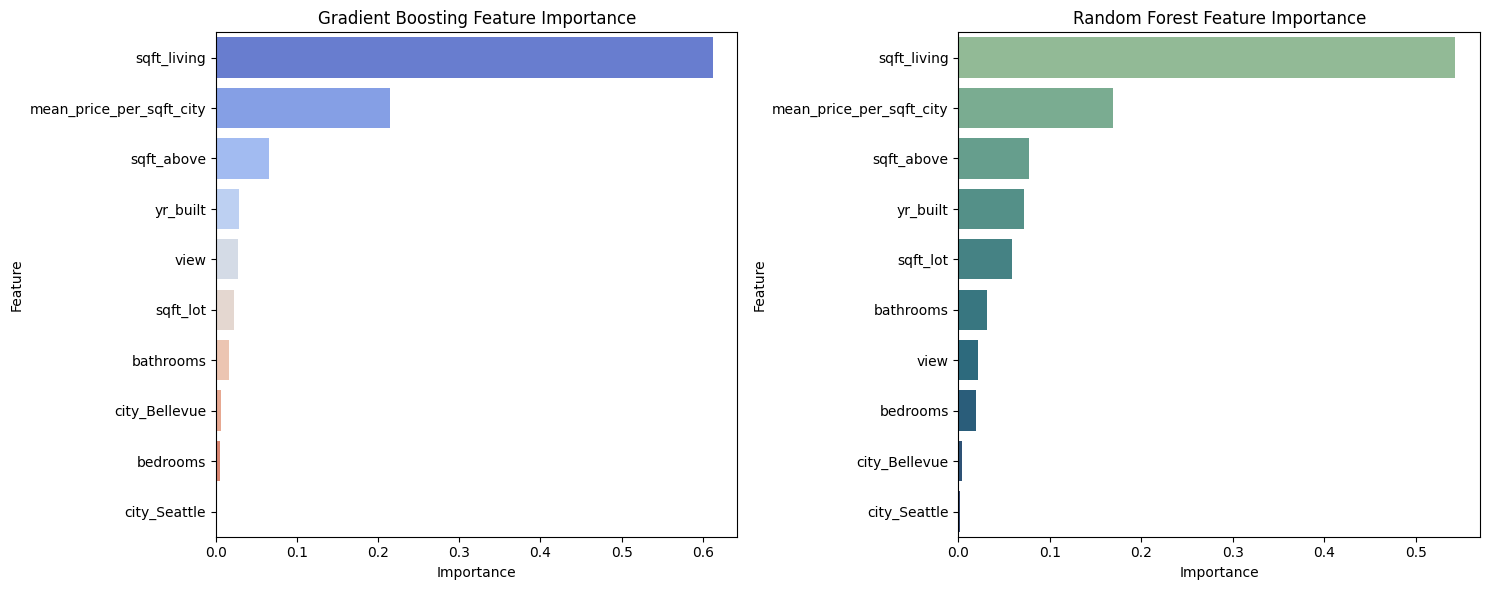

In [292]:
# Train both models
gbr = GradientBoostingRegressor().fit(X_train, y_train)
rf = RandomForestRegressor().fit(X_train, y_train)

# Create DataFrames
gbr_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': gbr.feature_importances_})
rf_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})

# Sort
gbr_imp = gbr_imp.sort_values(by='Importance', ascending=False).head(10)
rf_imp = rf_imp.sort_values(by='Importance', ascending=False).head(10)

# Print top 10 features
print("Top 10 Features - Gradient Boosting:")
print(gbr_imp.to_string(index=False))

print("\n Top 10 Features - Random Forest:")
print(rf_imp.to_string(index=False))

# Plot
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=gbr_imp, y='Feature', x='Importance', ax=axs[0], palette='coolwarm')
axs[0].set_title('Gradient Boosting Feature Importance')

sns.barplot(data=rf_imp, y='Feature', x='Importance', ax=axs[1], palette='crest')
axs[1].set_title('Random Forest Feature Importance')

plt.tight_layout()
plt.show()


**Top 10 Feature Importances:**
Understanding which features most influence house prices helps us interpret the model and make actionable recommendations.

Gradient Boosting Regressor
| Feature                    | Importance |
| -------------------------- | ---------- |
| `sqft_living`              | 0.6122     |
| `mean_price_per_sqft_city` | 0.2145     |
| `sqft_above`               | 0.0669     |
| `yr_built`                 | 0.0279     |
| `view`                     | 0.0272     |
| `sqft_lot`                 | 0.0216     |
| `bathrooms`                | 0.0168     |
| `city_Bellevue`            | 0.0060     |
| `bedrooms`                 | 0.0055     |
| `city_Seattle`             | 0.0011     |

Random Forest Regressor
| Feature                    | Importance |
| -------------------------- | ---------- |
| `sqft_living`              | 0.5412     |
| `mean_price_per_sqft_city` | 0.1669     |
| `sqft_above`               | 0.0791     |
| `yr_built`                 | 0.0720     |
| `sqft_lot`                 | 0.0598     |
| `bathrooms`                | 0.0306     |
| `view`                     | 0.0225     |
| `bedrooms`                 | 0.0195     |
| `city_Bellevue`            | 0.0045     |
| `city_Seattle`             | 0.0021     |


### Model Performance Comparison
| Model                           | R² Score   | MAE             | RMSE             |
| ------------------------------- | ---------- | --------------- | ---------------- |
| **Linear Regression**           | 0.6763     | $101,303.79     | $146,338.28      |
| **Ridge Regression**            | 0.6760     | $101,376.31     | $146,403.24      |
| **Lasso Regression**            | 0.6760    | $101,320.66     | $146,347.25     |
| **Optimized Decision Tree**     | 0.5805     | $119,574.35     | $166,593.99      |
| **Random Forest Regressor**     | 0.6287     | $108,043.70     | $156,725.73      |
| **Optimized Random Forest**     | 0.6324     | $107,785.49     | $155,943.21      |
| **Gradient Boosting Regressor** | 0.6969     | $97,820.38      | $141,594.02      |
| **Optimized Gradient Boosting** | **0.6984** | **$97,485.83**  | **$141,243.55**  |


#### Summary
OLS is your best statistical model and is important for inference and explanation.

Linear-based models like Linear Regression, Ridge, and Lasso all achieved similar performance, with an R² of approximately 0.6671 and RMSE around $148,400, making them reliable for inference and interpretation.

The Optimized Gradient Boosting Regressor emerged as the best overall predictive model, achieving the highest R² score (0.6984) and the lowest error rates — MAE: $97,485.83, RMSE: $141,243.55. This makes it the most accurate choice for predicting house prices in this dataset.

Although the Random Forest and Decision Tree models were enhanced through hyperparameter tuning, their performance remained lower than the gradient boosting models. Even the optimized versions of these tree-based models had noticeably higher error margins, indicating they may not capture the underlying patterns as effectively.

**Recommendations:**

Use Gradient Boosting for best predictive performance.

Use Linear models (e.g., Ridge/Lasso) for interpretability and baseline comparisons.

### Conclusions & Recommendations
#### Conclusions

1. Data Quality and Insights
The dataset provided meaningful information for predicting house prices, especially from features like sqft_living, view, city, and yr_built.

No major outliers were detected, as prices were already capped at the 99th percentile, ensuring a clean working dataset.

Features like sqft_living, mean_price_per_sqft_city, and view emerged as strong positive predictors of price, particularly in tree-based models.

2. Model Performance
Optimized Gradient Boosting Regressor emerged as the best performer, achieving the highest R² score (0.6984) and lowest MAE ($97,485.83) and RMSE ($141,243.55).

Linear models (Linear, Ridge, Lasso) performed consistently with R² ≈ 0.6671, highlighting their usefulness for interpretability but not best accuracy.

While OLS Regression had the highest R² in earlier runs, it showed multicollinearity warnings and did not offer a substantial gain in prediction accuracy.

Random Forest performed moderately well post-tuning (R² ≈ 0.6324), while the Optimized Decision Tree lagged behind (R² ≈ 0.5805), confirming ensemble methods are better suited for this task.

3. Feature Engineering and Limitations
Engineered features like mean_price_per_sqft_city offered useful contextual information and were highly ranked in feature importance, especially for Gradient Boosting and Random Forest.

Some features such as yr_renovated and sqft_basement had minimal or inconsistent influence across models.

Model performance remains moderate, indicating room for improvement through:

- Incorporating external datasets (e.g., crime rates, school scores, amenities)

- Using more granular location data (neighborhoods, lat/long)

- Exploring advanced ensemble or deep learning techniques if interpretability is less critical.


### Recommendations

1. Adopt Gradient Boosting for Price Prediction
Use the Optimized Gradient Boosting Regressor for deployment or future analysis. It consistently delivered the highest accuracy across all models (R² ≈ 0.6984, MAE ≈ $97,486), making it the most reliable predictive tool for this dataset.

2. Enrich the Dataset
Incorporate external and contextual data to enhance model performance and interpretability. Useful additions may include:

- Neighborhood or crime ratings

- School quality or proximity

- Distance to public transport or amenities

- Local market trends or interest rates

3. Refine Feature Engineering
Transform yr_renovated into a more meaningful format (e.g., boolean indicator or "years since renovation").

Handle inconsistencies or missing values in features like sqft_basement.

Continue exploring derived features like mean_price_per_sqft_city, which ranked highly in feature importance.

4. Develop a User-Facing Tool
Build a simple interactive dashboard using tools like Streamlit, Dash, or Tableau that allows users to input property details and receive real-time price predictions. This adds practical value to stakeholders like real estate agents or homebuyers.

5. Explore Advanced Models
Consider experimenting with:

Neural Networks for complex, non-linear relationships

XGBoost or CatBoost for performance improvements

Geospatial models if more granular location data (e.g., latitude and longitude) becomes available